In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('station_hour.csv')

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_3064\3103919852.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('station_hour.csv')


In [3]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1.941394e+06,1.469831e+06,2.035372e+06,2.060110e+06,2.098275e+06,1.352465e+06,2.089781e+06,1.846346e+06,1.863110e+06,1.727504e+06,1.546717e+06,513979.000000,2.018893e+06
mean,8.086481e+01,1.584839e+02,2.278825e+01,3.523689e+01,4.055115e+01,2.870856e+01,1.502366e+00,1.211602e+01,3.806408e+01,3.305493e+00,1.490266e+01,2.448881,1.801730e+02
std,8.947618e+01,1.397883e+02,4.846146e+01,3.497508e+01,5.590894e+01,2.753244e+01,6.292445e+00,1.467385e+01,4.710653e+01,1.214053e+01,3.329729e+01,8.973470,1.404095e+02
min,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000,5.000000e+00
25%,2.816000e+01,6.400000e+01,3.050000e+00,1.310000e+01,1.135000e+01,1.123000e+01,4.100000e-01,4.250000e+00,1.102000e+01,8.000000e-02,3.400000e-01,0.000000,8.400000e+01
50%,5.259000e+01,1.162500e+02,7.150000e+00,2.479000e+01,2.286000e+01,2.235000e+01,8.000000e-01,8.250000e+00,2.475000e+01,9.600000e-01,3.400000e+00,0.200000,1.310000e+02
75%,9.774000e+01,2.040000e+02,1.858000e+01,4.548000e+01,4.570000e+01,3.778000e+01,1.380000e+00,1.453000e+01,4.953000e+01,3.230000e+00,1.510000e+01,1.830000,2.590000e+02
max,1.000000e+03,1.000000e+03,5.000000e+02,4.999900e+02,5.000000e+02,4.999700e+02,4.985700e+02,1.999600e+02,9.970000e+02,4.980700e+02,4.999900e+02,499.990000,3.133000e+03


In [4]:
df.sem()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_3064\1459226325.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sem()


PM2.5      0.064217
PM10       0.115302
NO         0.033968
NO2        0.024368
NOx        0.038597
NH3        0.023675
CO         0.004353
SO2        0.010799
O3         0.034511
Benzene    0.009237
Toluene    0.026773
Xylene     0.012517
AQI        0.098819
dtype: float64

In [5]:
df.var()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_3064\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


PM2.5       8005.987041
PM10       19540.756968
NO          2348.513390
NO2         1223.256397
NOx         3125.809356
NH3          758.035395
CO            39.594866
SO2          215.321812
O3          2219.025416
Benzene      147.392425
Toluene     1108.709833
Xylene        80.523161
AQI        19714.836760
dtype: float64

In [8]:
df.mode()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,DL007,2020-03-11 09:00:00,30.0,94.0,1.0,9.0,0.0,10.0,0.0,3.0,5.0,0.0,0.0,0.0,102.0,Moderate
1,DL008,2020-03-11 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DL013,2020-03-11 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DL021,2020-03-11 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DL033,2020-03-11 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,NaN,2020-06-30 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2676,NaN,2020-06-30 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2677,NaN,2020-06-30 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2678,NaN,2020-06-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.median()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_3064\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


PM2.5       52.59
PM10       116.25
NO           7.15
NO2         24.79
NOx         22.86
NH3         22.35
CO           0.80
SO2          8.25
O3          24.75
Benzene      0.96
Toluene      3.40
Xylene       0.20
AQI        131.00
dtype: float64

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_3064\4033294746.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness=df.skew()


PM2.5       3.344412
PM10        2.047849
NO          4.765423
NO2         3.063309
NOx         3.603130
NH3         4.028852
CO         33.508087
SO2         4.786037
O3          5.474361
Benzene    21.345900
Toluene     5.839818
Xylene     16.347887
AQI         3.445451
dtype: float64


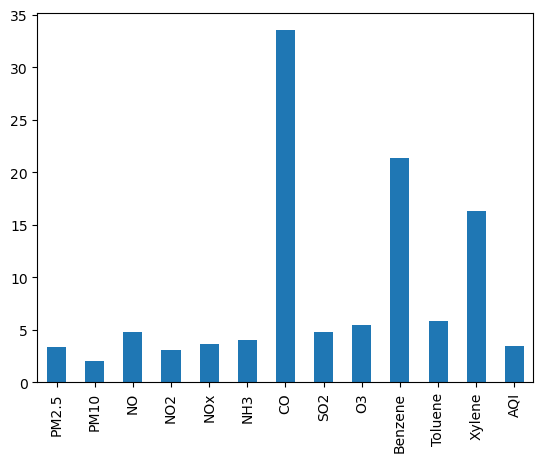

In [6]:
skewness=df.skew()
print(skewness)
skewness.plot(kind='bar')
plt.show()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_3064\1025669927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt = df.kurtosis()


PM2.5        18.305458
PM10          5.562030
NO           28.356179
NO2          17.480945
NOx          17.000603
NH3          34.330607
CO         1632.190283
SO2          36.042377
O3           57.530379
Benzene     662.178596
Toluene      49.998524
Xylene      444.268881
AQI          38.303665
dtype: float64


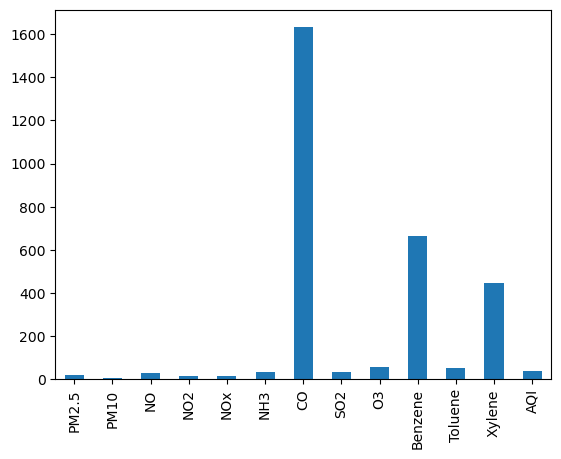

In [7]:
kurt = df.kurtosis()
print(kurt)
kurt.plot(kind='bar')
plt.show()

In [5]:
df['PM2.5'] = df['PM2.5'].fillna(df.groupby('StationId')['PM2.5'].transform('mean'))
df['PM10'] = df['PM10'].fillna(df.groupby('StationId')['PM10'].transform('mean'))
df['NO'] = df['NO'].fillna(df.groupby('StationId')['NO'].transform('mean'))
df['NO2'] = df['NO2'].fillna(df.groupby('StationId')['NO2'].transform('mean'))
df['NOx'] = df['NOx'].fillna(df.groupby('StationId')['NOx'].transform('mean'))
df['NH3'] = df['NH3'].fillna(df.groupby('StationId')['NH3'].transform('mean'))
df['CO'] = df['CO'].fillna(df.groupby('StationId')['CO'].transform('mean'))
df['SO2'] = df['SO2'].fillna(df.groupby('StationId')['SO2'].transform('mean'))
df['O3'] = df['O3'].fillna(df.groupby('StationId')['O3'].transform('mean'))
df['Benzene'] = df['Benzene'].fillna(df.groupby('StationId')['Benzene'].transform('mean'))
df['Toluene'] = df['Toluene'].fillna(df.groupby('StationId')['Toluene'].transform('mean'))
df['Xylene'] = df['Xylene'].fillna(df.groupby('StationId')['Xylene'].transform('mean'))

In [6]:
df.isnull().sum()

StationId           0
Datetime            0
PM2.5          118639
PM10           723586
NO              17677
NO2                 0
NOx             82938
NH3            949677
CO              37236
SO2            218805
O3             254030
Benzene        438472
Toluene        563737
Xylene        1898600
AQI            570190
AQI_Bucket     570190
dtype: int64

In [7]:
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['NO']=df['NO'].fillna((df['NO'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].median()))
df['NOx']=df['NOx'].fillna((df['NOx'].median()))
df['NH3']=df['NH3'].fillna((df['NH3'].median()))
df['CO']=df['CO'].fillna((df['CO'].median()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['Benzene']=df['Benzene'].fillna((df['Benzene'].median()))
df['Toluene']=df['Toluene'].fillna((df['Toluene'].median()))
df['Xylene']=df['Xylene'].fillna((df['Xylene'].median()))

In [8]:
df['Datetime'].apply(pd.to_datetime)
df.set_index('Datetime',inplace=True)

In [10]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0
df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

In [11]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))

In [12]:
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

In [13]:
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

In [14]:
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

In [15]:
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

In [16]:
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [17]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis=1)))

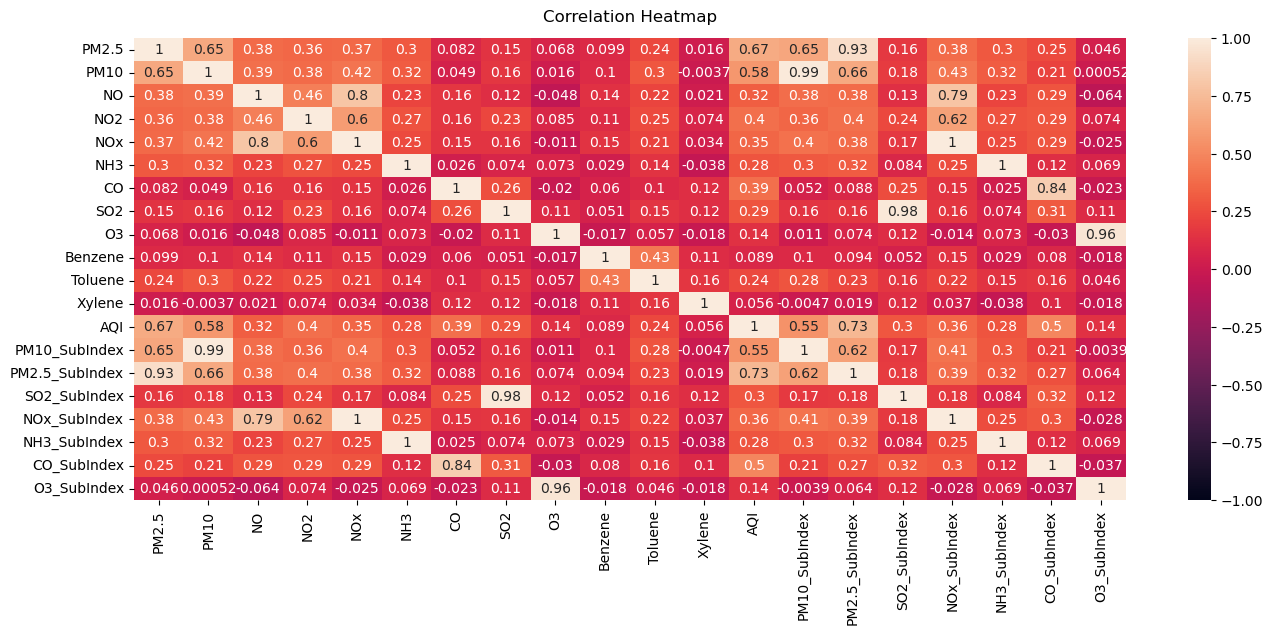

In [18]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [19]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [20]:
X=df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex", 'Benzene', 'Toluene', 'Xylene']]
y=df[['AQI']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [23]:
DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [24]:
predicted=DT.predict(X_test)

In [27]:
print('Root Squared Error :',format(np.sqrt( mean_squared_error(y_test,predicted))))
print('R_squared:',r2_score(y_test,predicted))
print("Mean absolute error :", mean_absolute_error(y_test,predicted))

Root Squared Error : 87.99462055363534
R_squared: 0.5623944447283123
Mean absolute error : 44.8008138022812


In [26]:
df

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-24 17:00:00,AP001,60.50,98.00,2.35,30.80,18.25,8.50,0.10,11.85,126.40,...,0.10,138.0,Moderate,98.000000,100.000000,13.75,22.50,2.00,0.0,138.235294
2017-11-24 18:00:00,AP001,65.50,111.25,2.70,24.20,15.07,9.77,0.10,13.17,117.12,...,0.15,125.0,Moderate,107.333333,116.666667,16.25,18.75,2.25,0.0,125.000000
2017-11-24 19:00:00,AP001,80.00,132.00,2.10,25.18,15.15,12.02,0.10,12.08,98.98,...,0.18,167.0,Moderate,121.333333,166.666667,15.00,18.75,3.00,0.0,98.000000
2017-11-24 20:00:00,AP001,81.50,133.25,1.95,16.25,10.23,11.58,0.10,10.47,112.20,...,0.10,170.0,Moderate,122.000000,170.000000,12.50,12.50,2.75,0.0,117.647059
2017-11-24 21:00:00,AP001,75.25,116.00,1.43,17.48,10.43,12.03,0.10,9.12,106.35,...,0.08,150.0,Moderate,110.666667,150.000000,11.25,12.50,3.00,0.0,108.823529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 20:00:00,WB013,15.55,47.80,7.27,35.08,42.38,31.25,0.80,9.40,17.24,...,0.45,59.0,Satisfactory,47.000000,25.000000,11.25,52.50,7.75,0.0,17.000000
2020-06-30 21:00:00,WB013,15.23,42.30,6.10,26.78,32.85,30.66,0.56,4.91,17.46,...,0.45,59.0,Satisfactory,42.000000,25.000000,5.00,40.00,7.50,0.0,17.000000
2020-06-30 22:00:00,WB013,11.40,40.95,6.58,19.53,26.12,30.73,0.61,3.81,17.24,...,0.45,59.0,Satisfactory,40.000000,18.333333,3.75,32.50,7.50,0.0,17.000000


# Comparision of RMSE, MAE, R-Squarred error for all regression

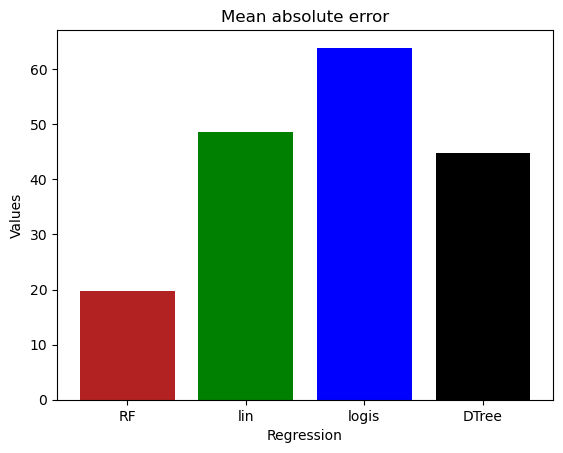

In [33]:
x= ['RF', 'lin', 'logis', 'DTree']
y=[19.699, 48.59, 63.892, 44.8008]
plt.bar(x,y, color=['firebrick', 'green', 'blue', 'black', 'red',
                    'purple', 'seagreen', 'skyblue', 'black', 'tomato'])
plt.xlabel('Regression')
plt.ylabel("Values")
plt.title('Mean absolute error')
plt.show()

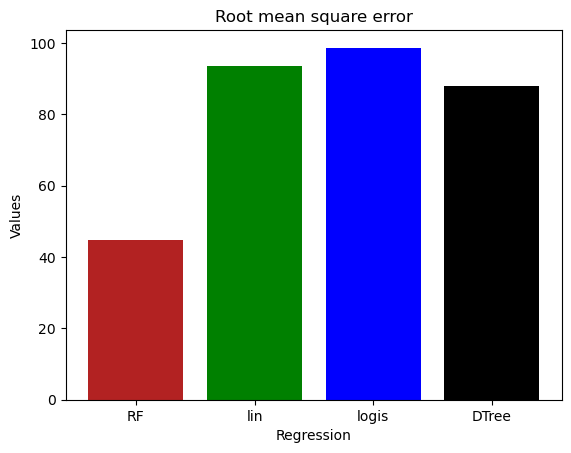

In [35]:
x= ['RF', 'lin', 'logis', 'DTree']
y=[44.800, 93.66, 98.70, 87.99]
plt.bar(x,y, color=['firebrick', 'green', 'blue', 'black', 'red',
                    'purple', 'seagreen', 'skyblue', 'black', 'tomato'])
plt.xlabel('Regression')
plt.ylabel("Values")
plt.title('Root mean square error')
plt.show()

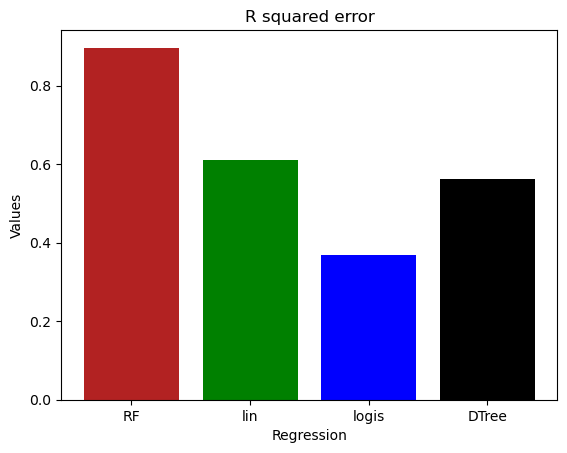

In [36]:
x= ['RF', 'lin', 'logis', 'DTree']
y=[0.8966, 0.610, 0.3690,0.5623]
plt.bar(x,y, color=['firebrick', 'green', 'blue', 'black', 'red',
                    'purple', 'seagreen', 'skyblue', 'black', 'tomato'])
plt.xlabel('Regression')
plt.ylabel("Values")
plt.title('R squared error')
plt.show()